# EDA Machine learning project 


*The objective of the following project is to evaluate the projection of electric vehicle charging stations in regions where this sector is still in full growth. Initially, we will seek to predict the number and type of stations needed.*

*Primarily, we will conduct an exploratory analysis of a database obtained through the API of the U.S. Department of Energy. This will allow us to observe the number of stations currently distributed throughout the U.S., along with information related to each of them.*

*For the purpose of our analysis, our dependent variables will be stations_number, EV Level1 EVSE Num, EV Level2 EVSE Num, and EV DC Fast Count.*

## Data importation and first inspection 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/workspaces/Machine-Learning-Final-Project/data/raw/electric_stations.csv')
print(df.shape)
print(df.info())
df.head()


(70830, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70830 entries, 0 to 70829
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           70830 non-null  object 
 1   Station Name                             70829 non-null  object 
 2   Street Address                           70750 non-null  object 
 3   Intersection Directions                  2556 non-null   object 
 4   City                                     70782 non-null  object 
 5   State                                    70830 non-null  object 
 6   ZIP                                      70786 non-null  object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            67107 non-null  object 
 9   Status Code                              70830 non-null  object 
 10  Expected Date                     

/tmp/ipykernel_24383/2644454803.py:6: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/workspaces/Machine-Learning-Final-Project/data/raw/electric_stations.csv')


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
2,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,True
3,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,ELEC,LADWP - Harbor Generating Station,161 N Island Ave,At B St,Wilmington,CA,90744,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


*We can observe that we have a dataset consisting of 70830 rows and 74 variables. First, we will analyze which variables have null values to discard them, and then we will examine the data according to their type.*

In [38]:
df.columns


Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

## Verification of variables with all null values 

### Check for columns with null values



In [39]:
# Check for columns with all null values
columns_with_null = df.columns[df.isnull().all()]
print(len(columns_with_null))
print("Columns with all null values:")
print(columns_with_null)

32
Columns with all null values:
Index(['Plus4', 'BD Blends', 'NG Fill Type Code', 'NG PSI',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Intersection Directions (French)',
       'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends',
       'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures',
       'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI',
       'CNG Vehicle Class', 'LNG Vehicle Class', 'RD Blends',
       'RD Blends (French)', 'RD Blended with Biodiesel',
       'RD Maximum Biodiesel Level', 'CNG Station Sells Renewable Natural Gas',
       'LNG Station Sells Renewable Natural Gas'],
      dtype='object')


*The dataframe has a total of 32 variables with all their data null, which we will proceed to remove since they would not be providing us with information for the analysis.*

### Drop columns with all null values

In [40]:
# Drop columns with all null values
df = df.drop(columns=columns_with_null)

print(df.shape)
print(df.info())

(70830, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70830 entries, 0 to 70829
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70830 non-null  object 
 1   Station Name                      70829 non-null  object 
 2   Street Address                    70750 non-null  object 
 3   Intersection Directions           2556 non-null   object 
 4   City                              70782 non-null  object 
 5   State                             70830 non-null  object 
 6   ZIP                               70786 non-null  object 
 7   Station Phone                     67107 non-null  object 
 8   Status Code                       70830 non-null  object 
 9   Expected Date                     4510 non-null   object 
 10  Groups With Access Code           70830 non-null  object 
 11  Access Days Time                  63521 non-null  objec

*We removed the variables with null data, which reduces our dataframe to 70830 entries and 42 variables.*

## Analysis of variables 

### Analysis of Categorical Variables


In [41]:
categorical_variables = df.select_dtypes(include='object').columns.tolist()
print(len(categorical_variables))
print(categorical_variables)


35
['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Station Phone', 'Status Code', 'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted', 'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status', 'Date Last Confirmed', 'Updated At', 'Owner Type Code', 'Federal Agency Name', 'Open Date', 'EV Connector Types', 'Country', 'Groups With Access Code (French)', 'Access Code', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'EV Pricing', 'EV On-Site Renewable Source', 'Restricted Access', 'NPS Unit Name', 'Maximum Vehicle Class', 'EV Workplace Charging']


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group by state and count occurrences of each categorical variable
grouped_data = df.groupby('State').count()

# Assuming 'dataframe' is your DataFrame containing the categorical variables
categorical_vars = grouped_data.columns

# Calculate the number of rows and columns for subplots
num_vars = len(categorical_vars)
num_cols = 1
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 180))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_vars):
    sns.countplot(data=grouped_data, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by State')

# Remove empty subplots if needed
if num_rows * num_cols > num_vars:
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


*We have a total of 35 categorical variables, which for better management and visualization of the information, it was decided to group them by state. Since the initial database was very extensive, and for the analysis that will be carried out, it is convenient to have the information by state.*

### Analysis of Numeric Variables


In [ ]:
numeric_variables = df.select_dtypes(include='number').columns.tolist()
print(len(numeric_variables))
print(numeric_variables)

7
['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Latitude', 'Longitude', 'ID', 'Federal Agency ID']


*Initially, we have 7 numerical variables, but for the purpose of this project, it is necessary to know the number of electric power stations that exist per state in the US. So, we will proceed to create this new variable and integrate it into the existing dataframe.*

In [18]:
import pandas as pd

# Group by state and calculate the number of stations in each state
stations_number = df.groupby('State').size().rename('stations_number')

# Merge the stations_number Series with the original DataFrame
df = df.merge(stations_number, on='State', how='left')

# Now the 'stations_number' variable is added to the original DataFrame
print(df.head())


  Fuel Type Code                       Station Name      Street Address  \
0           ELEC           LADWP - Truesdale Center  11797 Truesdale St   
1           ELEC      Los Angeles Convention Center  1201 S Figueroa St   
2           ELEC      LADWP - John Ferraro Building       111 N Hope St   
3           ELEC         LADWP - Haynes Power Plant       6801 E 2nd St   
4           ELEC  LADWP - Harbor Generating Station    161 N Island Ave   

    Intersection Directions         City State    ZIP Station Phone  \
0                       NaN   Sun Valley    CA  91352           NaN   
1  West hall and South hall  Los Angeles    CA  90015  213-741-1151   
2               Across Hope  Los Angeles    CA  90012           NaN   
3                       NaN   Long Beach    CA  90803           NaN   
4                   At B St   Wilmington    CA  90744           NaN   

  Status Code Expected Date  ... Access Detail Code Federal Agency Code  \
0           E           NaN  ...               

In [19]:
numeric_variables = df.select_dtypes(include='number').columns.tolist()
print(len(numeric_variables))
print(numeric_variables)

8
['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Latitude', 'Longitude', 'ID', 'Federal Agency ID', 'stations_number']


*As can be seen, after creating and adding the new variable "station_number," we now have 8 numerical variables in our dataset.*

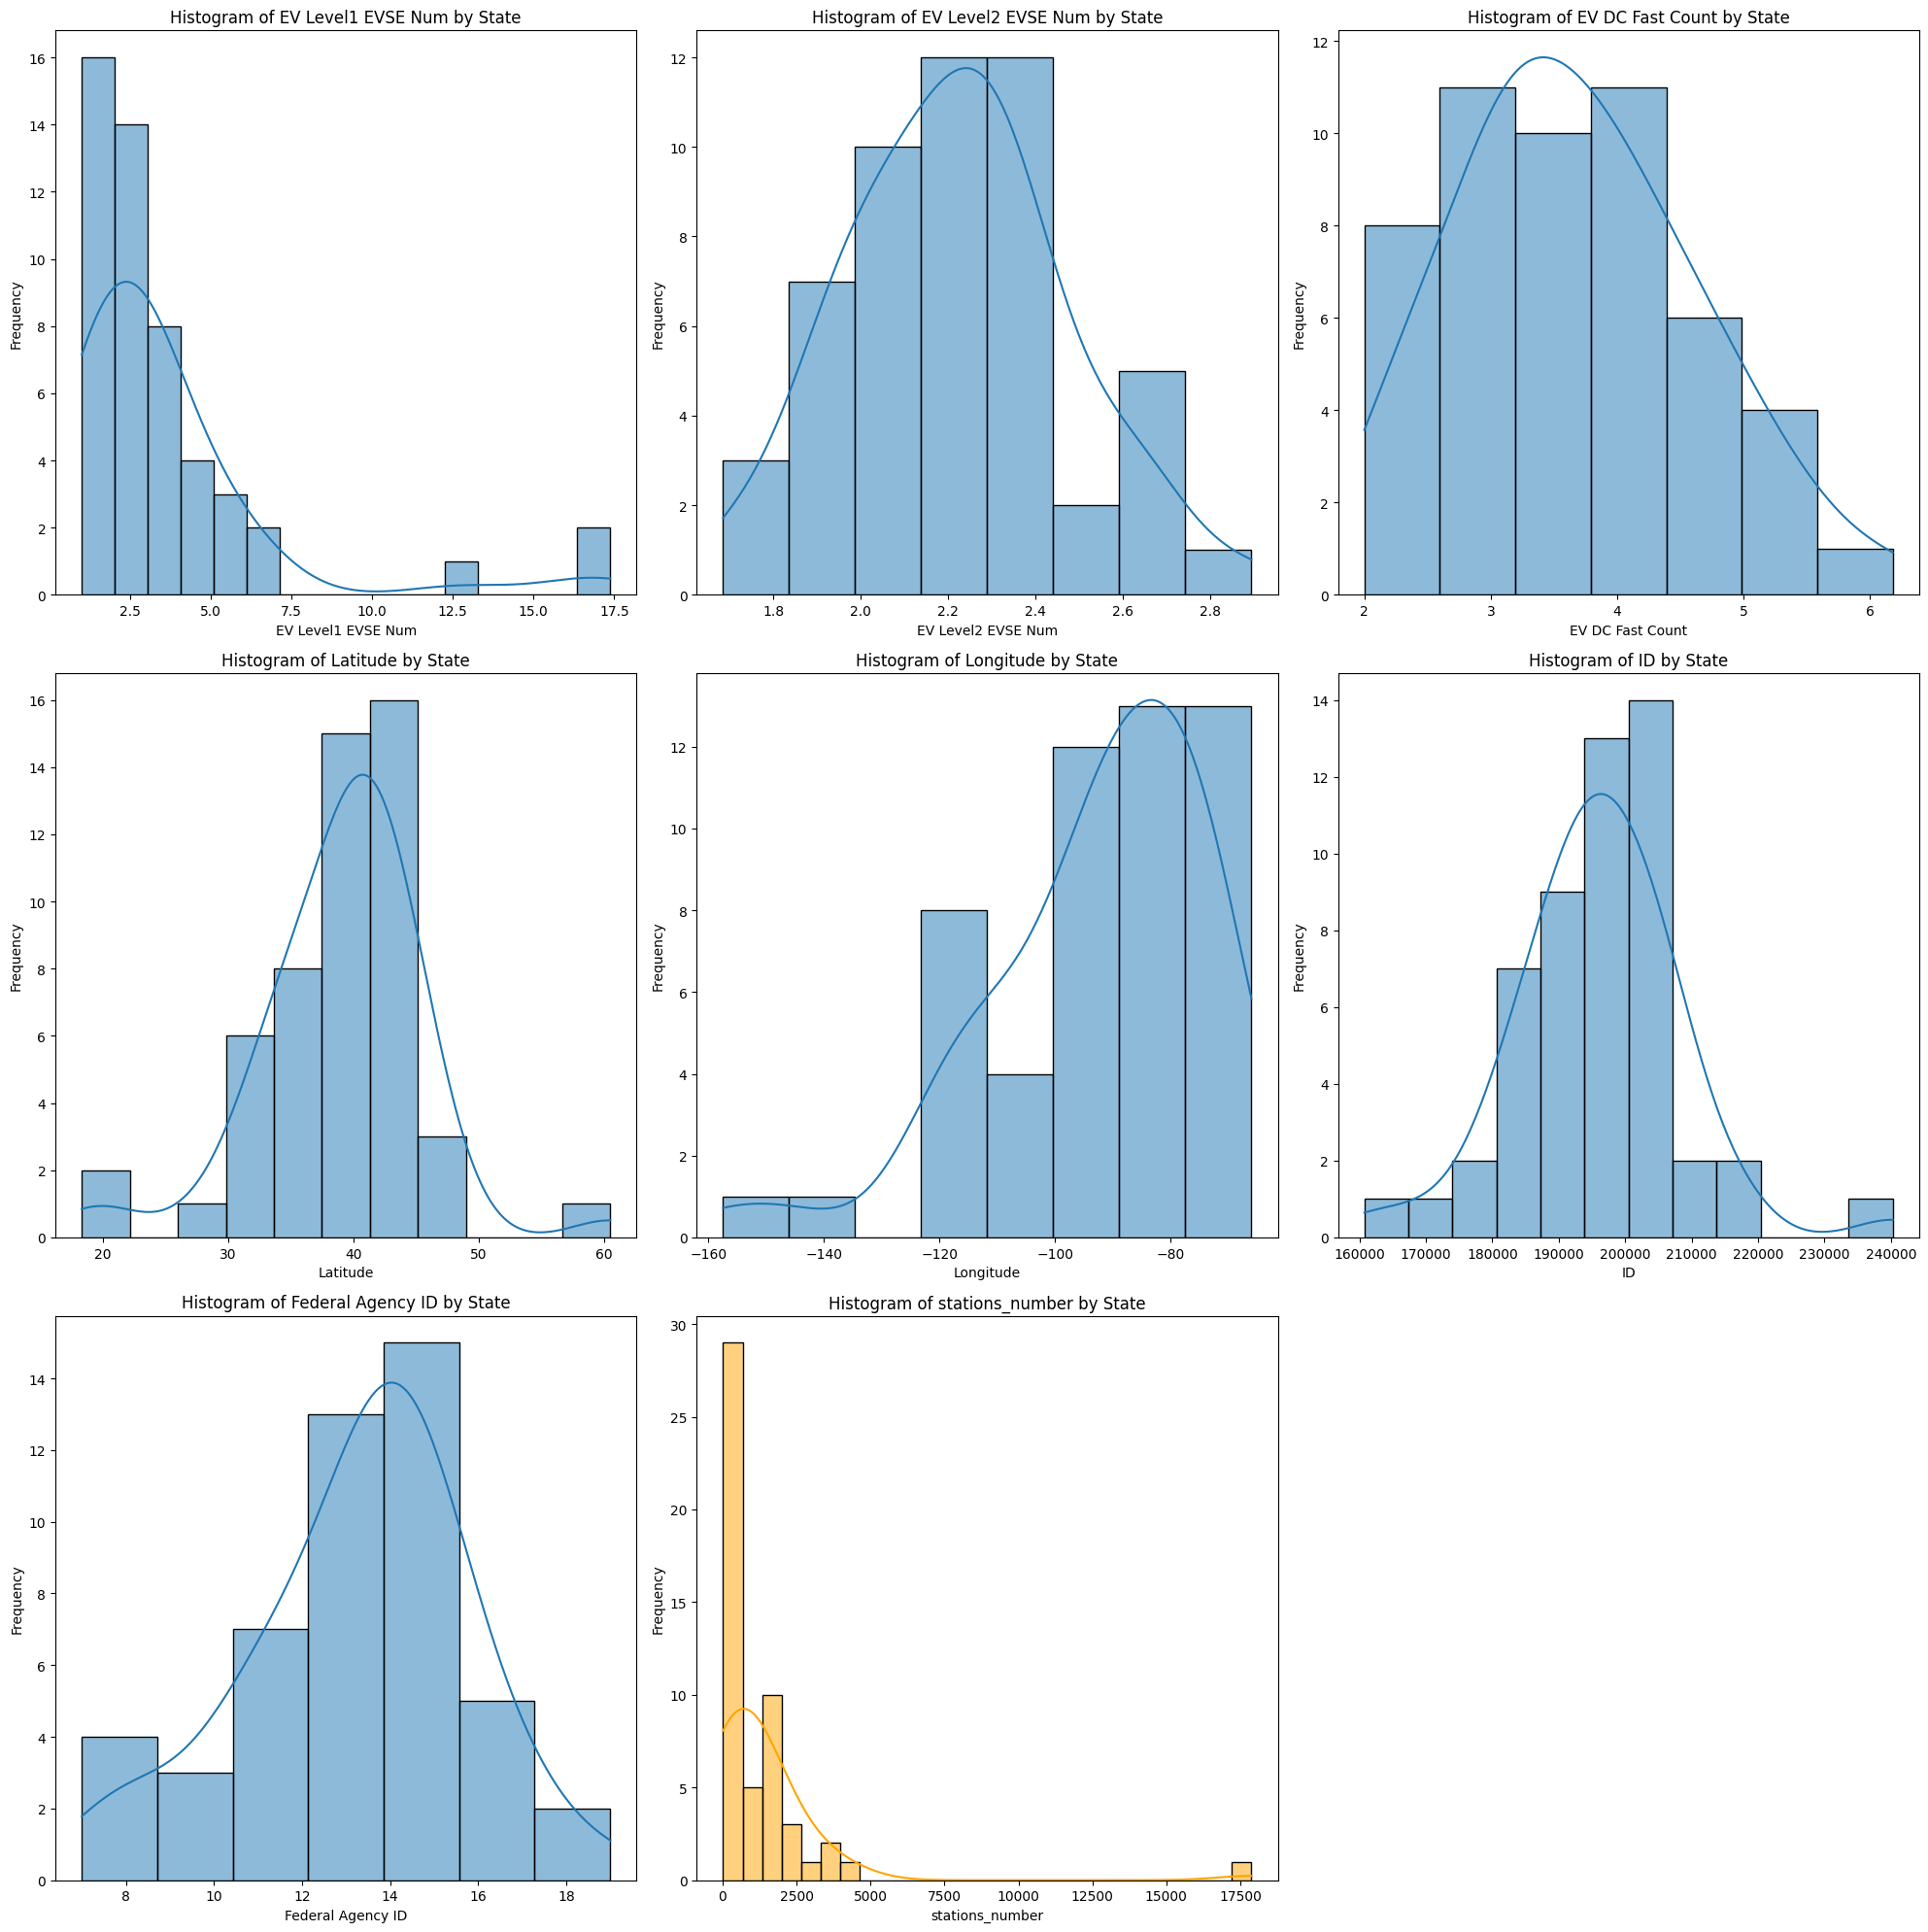

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group by state and calculate statistics for each numerical variable
grouped_data = df.groupby('State').describe()

# Get all numerical variables
numerical_vars = grouped_data.columns.levels[0]

# Calculate the number of rows and columns for subplots
num_vars = len(numerical_vars)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical variable
for i, col in enumerate(numerical_vars):
    if col == 'stations_number':
        sns.histplot(data=grouped_data[col]['mean'], ax=axes[i], kde=True, color='orange')
    else:
        sns.histplot(data=grouped_data[col]['mean'], ax=axes[i], kde=True)
    
    axes[i].set_title(f'Histogram of {col} by State')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if needed
if num_rows * num_cols > num_vars:
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



## Variables Stadistics

*Dataframe stadistics*

In [27]:
# Define the list of columns you want to calculate statistics for
columns_to_analyze = df.columns[:43]  # Adjust the range as needed

# Define a function to calculate statistics for a single column
def calculate_statistics(column):
    if df[column].dtype == 'object':
        value_counts = df[column].value_counts()
        mode = value_counts.index[0]
        mode_count = value_counts.iloc[0]
        unique_count = len(value_counts)
        missing_values = df[column].isnull().sum()
        
        return {
            "Column": column,
            "Mode": mode,
            "Mode Count": mode_count,
            "Unique Count": unique_count,
            "Missing Values": missing_values
        }
    else:
        median = df[column].median()
        mode = df[column].mode().iloc[0]
        mean = df[column].mean()
        std_dev = df[column].std()
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()
        
        return {
            "Column": column,
            "Median": median,
            "Mode": mode,
            "Mean": mean,
            "Standard Deviation": std_dev,
            "Skewness": skewness,
            "Kurtosis": kurtosis
        }

# Iterate over the columns and calculate statistics
statistics_results = []
for column in columns_to_analyze:
    statistics_results.append(calculate_statistics(column))

# Convert the results to a DataFrame
statistics_df = pd.DataFrame(statistics_results)

# Print the results
print(statistics_df)

                              Column                                  Mode  \
0                     Fuel Type Code                                  ELEC   
1                       Station Name             Wawa - Tesla Supercharger   
2                     Street Address                      2910 Tannery Way   
3            Intersection Directions                                   .||   
4                               City                           Los Angeles   
5                              State                                    CA   
6                                ZIP                                 94025   
7                      Station Phone                          888-758-4389   
8                        Status Code                                     E   
9                      Expected Date                            2022-09-09   
10           Groups With Access Code                                Public   
11                  Access Days Time                        24 h

## Relationship between variables

/tmp/ipykernel_24383/2207259356.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(str)


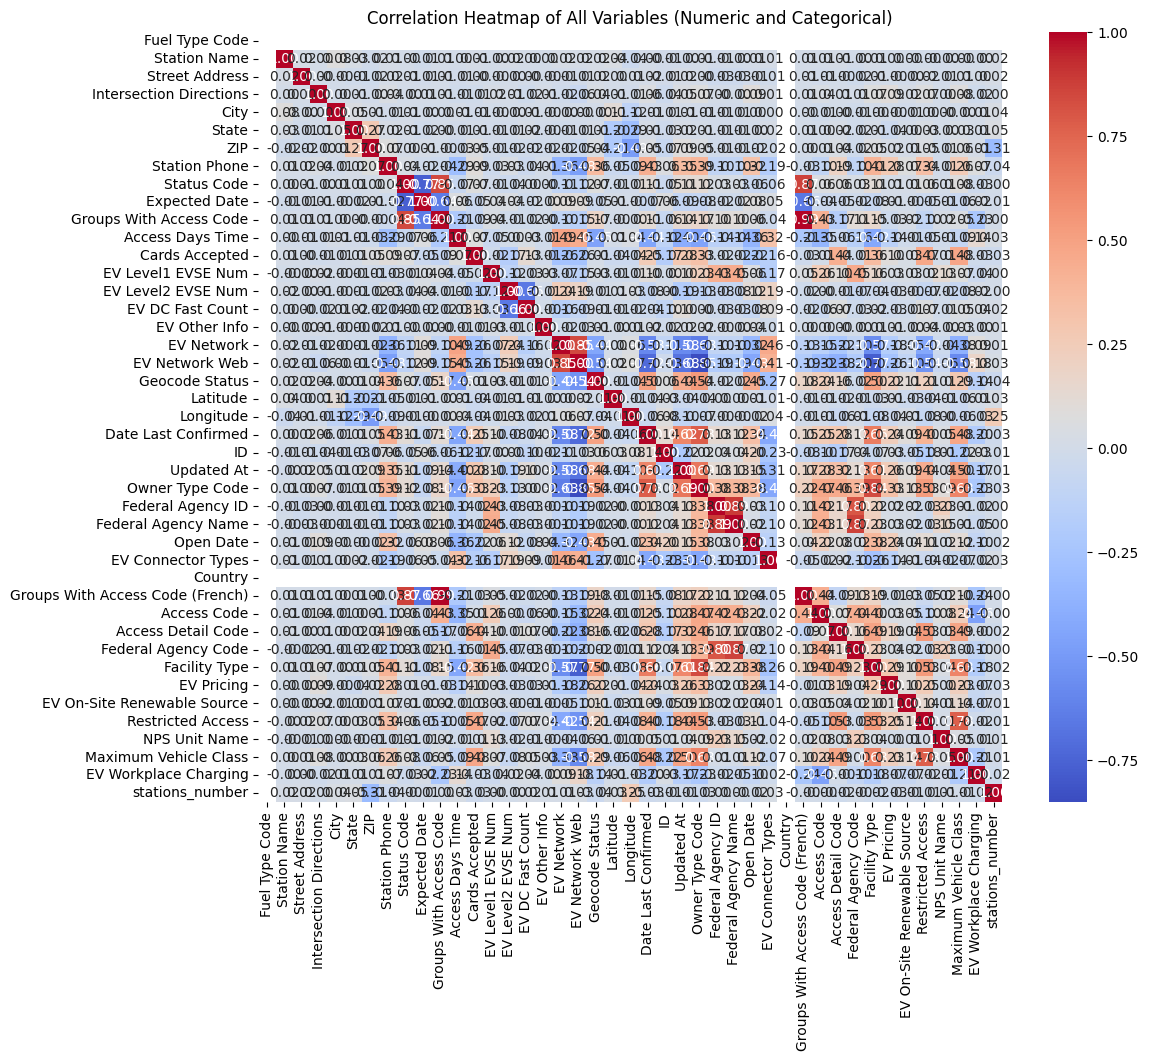

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert all non-numeric columns to string
df = df.applymap(str)

# Encode all categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = label_encoder.fit_transform(df[col])

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Compute the correlation matrix
corr_matrix = df_scaled.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Variables (Numeric and Categorical)')
plt.show()



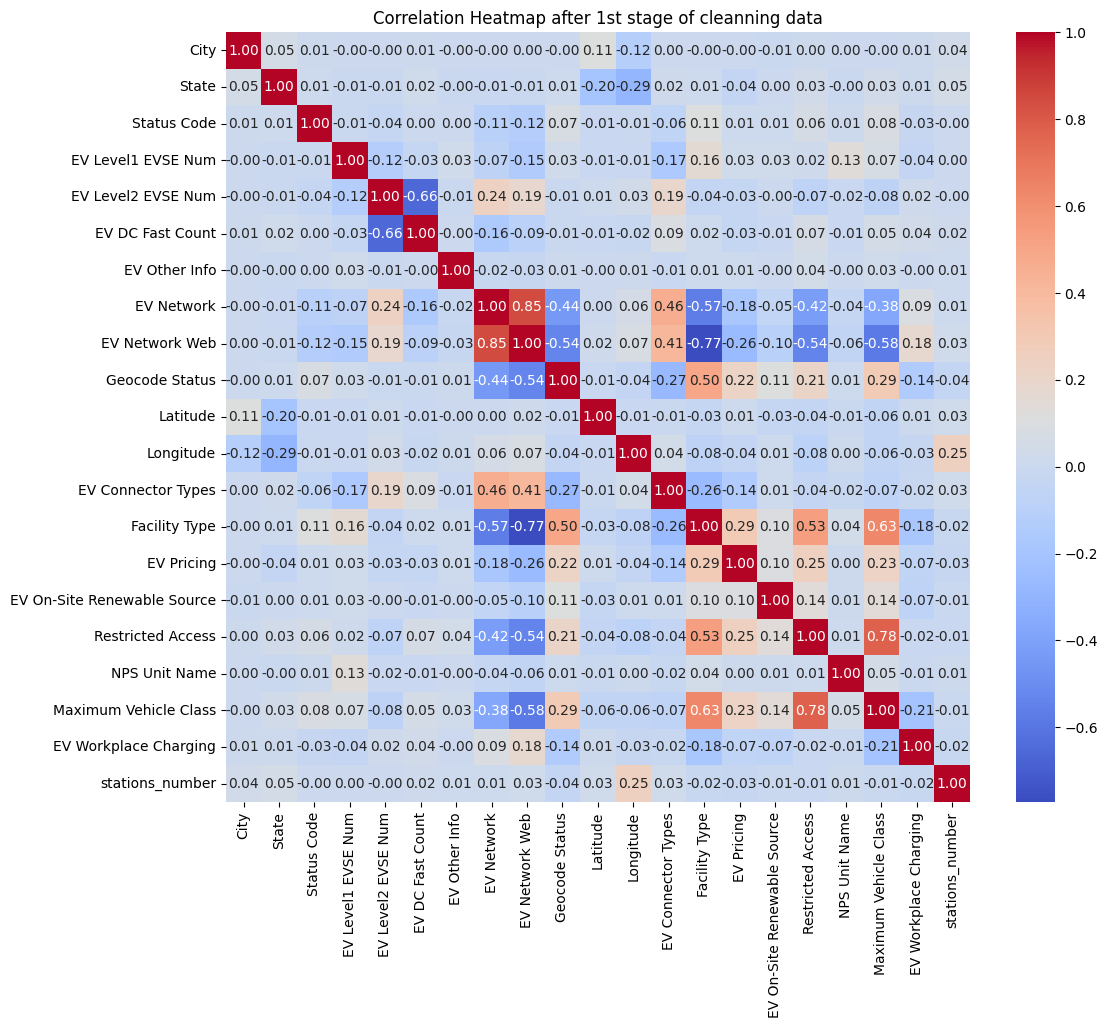

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop specified variables
variables_to_drop = ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions',
                     'ZIP', 'Station Phone', 'Expected Date', 'Country', 'Groups With Access Code',
                     'Access Days Time', 'Cards Accepted', 'Date Last Confirmed', 'ID', 'Updated At',
                     'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Open Date',
                     'Groups With Access Code (French)', 'Access Code', 'Access Detail Code',
                     'Federal Agency Code','City']

df_cleaned = df.drop(variables_to_drop, axis=1)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap after 1st stage of cleanning data')
plt.show()
